In [215]:
#House price regression
#URL : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/notebooks

## ML Project Checklist ( From the hands-on book )
NOTE: AUTOMATE EVERYTHING AS MUCH AS POSSIBLE

**STEP**

1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data and gain insights
4. Prepare the data
5. Explore models and pick out the best one
6. Fine tune your models and combine them to a great solution
7. Present solution
8. Launch, monitor, and maintain your system

------------------------------

**Frame the problem**
1. What's the objective of business terms
2. How will your solution used?
3. What are the current solution?
4. How you should frame this problem ( supervised, unsupervised, online, offline, etc... )
5. How should performance be measured?
6. Is the performance measure aligned with the business objectives?
7. What's the minimum performance to reach business objectives?
8. Is there similiar problems? how can you reuse the tools?
9. Is human expertise available? How the problem can be solved manually?
10. List the assumptions you have made SO FAR
11. Verify asssumptions if possible

**Get the data**
NOTE: Automate as much as possible so you can easily get the data

1. List the data you need and how much you need
2. Find the documents you can get the data
3. Check how much space it'll take
4. Check legal obligations and authorizations
5. Get access
6. Create a workspace
7. Get the data
8. Convert the data to a format you can manipulate
9. Ensure sensitive information is deleted or protected 
10. Check the size and type of data ( time series, sample, geographical, ... )
11. Sample a test set, put it aside, and NEVER LOOK AT IT

**Explore the data**
NOTE: Expert insights in the current field would be very useful ( If you're working on house price, real estate knowledge would be very useful. If you're working on stock database, stock trading knowledge would be useful ) 

1. Create a copy of the data for exploration
2. Create a jupyter notebbook for data exploration
3. Study each attribute and its characteristics:
    - Name
    - Type ( Categorical, int/float, bounded/unboaded, text, structured, etc, ... )
    - % of missing values
    - Noisiness and type of noise (stochastic , outliers, rounding errors, etc ... )
    - Usefulness of the task
    - Type of distribbbution ( Guassian, uniform, logarithmic, etc, ... ) 
4. For supervised tasks, define target value
5. Visualize the data (https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)
6. Study the correlations between attributs
7. Study how you'd solve the problem manually
8. Identify the promising transformations you may want to apply
9. Identify extra data that would be useful ( Go back to get data step ) 
10. Document what you've learned

**Prepare the data**
NOTES: 
    Work on copies of the data
    Write functions for all data transformations you apply and document them so:
        1. You can reuse these transformations in another similar dataset
        2. To clean an prepare the test set
        3. To clean and prepare new data instance when you're solution is LIVE
        4. To make it easy to treat your preparation choices as hyperparameters
1. Data cleaning:
    - Fix or remove outliers
    - Fill in missing values ( with mean, zero, median, ... ) or drop those rows
2. Feature selection 
    - Drop the attributes that provide no useful information for the task
    - OPTIONAL: if you're working on regression problems, consider stepwise regression
3. Feature engineering, if appropriate:
    - Discretize continous features
    - Decompose features ( categorical, data/time, etc, ... ) 
    - Add promising transformations of features ( log(x), sqrt(x), etc ... )
    - Aggregate features into promising new features
    
4. Feature scaling
    - Standardize or normalize features

**Shortlist promising models**
Notes:
    If the data is huge, consider sample smaller training sets so you can train many different models in reasonable times ( be aware this penalizes complex model such as NN or RandomForests) 
    Try to automate this step as much as possible
    
1. Train many quick models from different categories ( linear, naive, SVM, Random Forest, Neural Nets, etc ... )
2. Measure and compare performances 
    - For each model, us N-fold cross validation and compute the mean and sd
3. Analyze the most significant variable for each algorithm
4. Analyze the types of errors the models make
    - Ask yourself: "What data would a human used to avoid these mistakes"
5. Perform a quick round of feature selection and engineering
6. Peform 1 or 2 more quick iterations of previous 5 steps
7. Short list the top 5 models. preferring models that make different types of errors

**Fine-tune the system**
NOTE: 
    You want to use as much data as possible for this step, espcially when you move to the end of fine-tuneing

1. Fine-tune the hyperparameters using cross-validation
    - Treat your data transformation as hyperparams ( like you can try to drop the null values instead of filling with median values, and try again with filling mean )
    - Unless there are few hyperparams to explore, prefer random search over grid search. If training is long, Bayesian optimization may be helpful
    
2. Try ensemble methods, combining the best models will often produce better performance
3. Once you are confident about the final model, measure its performnance on the test set to estimate generalization error

DANGER: Don't tweak your model after measuring the generalization error, you'd just START OVERFITTING the test set

**Pressent solution**

**Launch**
1. Deploy model to system
    - Refresh your model on a regular basis on fresh data ( AUTOMATE AS MUCH AS POSSIBLE ) 






In [216]:
#Basic import
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import os
import scipy.stats as stats
import numpy as np
import math

In [217]:
#PATH to csv
ROOT = "./datasets/house-price/"
TRAIN_PATH = "./datasets/house-price/train.csv"
TEST_PATH = "./datasets/house-price/test.csv"
GRAPHS_PATH = "./datasets/house-price/graphs/"
SAVED_PROCESSED_DF = "./datasets/house-price/saved_df/"

if os.path.exists(GRAPHS_PATH) == False:
    print(os.mkdir(GRAPHS_PATH))

if os.path.exists(SAVED_PROCESSED_DF) == False:
    print(os.mkdir(SAVED_PROCESSED_DF))
    
    
#Turn off if don't want to save graphs as image
save_graphs = False

In [218]:
train_df_raw = pd.read_csv(TRAIN_PATH)
test_df_raw = pd.read_csv(TEST_PATH)

In [219]:
train_df_raw.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [220]:
print(train_df_raw.shape)
print(test_df_raw.shape)

(1460, 81)
(1459, 80)


In [221]:
#EDA

def get_types(df, debug = False):
    '''
        @param
        df: dataframe
        debug: print out the dictionary
        
        @return dict
    '''
    types = {}
    for column in df.columns:
        types.setdefault(column, df[column].dtype)
    if(debug):
        print(types)
    return types

def get_mean(df, debug = False):
    '''
        @param
        df: dataframe
        debug: print out the dictionary
        
        @return dict
    '''
    means = {}
    for column in df.columns:
        if(df[column].dtype!='object'):
            mean = "{:.2f}".format(df[column].mean())
        else:
            mean = ""
        means.setdefault(column, mean)
    if(debug):
        print(means)
    return means

def get_median(df, debug = False):
    '''
        @param
        df: dataframe
        debug: print out the dictionary
        
        @return dict
    '''
    medians = {}
    for column in df.columns:
        if(df[column].dtype!='object'):
            median = "{:.2f}".format(df[column].median())
        else:
            median = ""
        medians.setdefault(column, median)
    if(debug):
        print(medians)
    return medians

def get_kurtosis(df, debug = False):
    '''
        @param
        df: dataframe
        debug: print out the dictionary
        
        @return dict
    '''
    kurts = {}
    for column in df.columns:
        if(df[column].dtype!='object'):
            kurt = "{:.2f}".format(df[column].kurtosis())
        else:
            kurt = ""
        kurts.setdefault(column, kurt)
    if(debug):
        print(kurts)
    return kurts

def get_skewness(df, debug = False):
    '''
        @param
        df: dataframe
        debug: print out the dictionary
        
        @return dict
    '''
    skews = {}
    for column in df.columns:
        if(df[column].dtype!='object'):
            skew = "{:.2f}".format(df[column].skew())
        else:
            skew = ""
        skews.setdefault(column, skew)
    if(debug):
        print(skews)
    return skews


        
def count_missing_values(df, debug=False):
    '''
    @param
    df: dataframe
    debug: print out the dictionary

    @return dict
    '''
    missing_sum = {}
    for column in df.columns:
        missing_sum.setdefault(column, df[column].isna().sum())
    if(debug):
        print(missing_sum)
    return missing_sum

def count_unique_object_values(df, debug=False):
    '''
    @param
    df: dataframe
    debug: print out the dictionary

    @return dict
    '''
    unique_counts = {}
    for column in df.columns:
        count = len(df[column].unique())
        unique_counts.setdefault(column, count)
    if(debug):
        print(unique_counts)
    return unique_counts

def count_outliers(df, debug=False):
    '''
        Count all outliers for numeric variable
        lower inner fence: Q1 - 1.5*IQ
        upper inner fence: Q3 + 1.5*IQ
        IQR = Q3 - Q1
        Any point outside IQR is considered an outlier
        
        @param
            df: dataframe
            debug: print out the dictionary

        @return dict
    '''
    outliers = {}
    for column in df.columns:
        if(str(df[column].dtype).startswith("int")):
            quantiles = df[column].quantile([0.25,0.75])
            q1 = quantiles[0.25]
            q3 = quantiles[0.75]
            
            iqr = q3 - q1
            count =(((df[column] < q1 - 1.5 * iqr) | (df[column] > q3 + 1.5 * iqr))==True).sum()
        else:
            count=""
        outliers.setdefault(column, str(count))
            
    if(debug):
        print(outliers)
    return outliers

def get_correlation_to_target(df, target, debug = False):
    '''
        @param
        df: dataframe
        target: Target value to calculate correlations
        debug: print out the dictionary
        
        @return dict
    '''
    corr_to_sale = df.corrwith(df[target])

    return corr_to_sale.to_dict()

        
def merge_dict_to_df(list_of_dict, columns = []):
    merged = pd.DataFrame(list_of_dict)
    merged = merged.T
    merged.columns = columns
    return merged

def get_low_correlation_columns(df, target, threshold = 0.3):
    corr_matrix = df.corr()
    series = corr_matrix[target]
    low_corr = []
    for name, val in series.iteritems():
        if(abs(val) <= threshold):
            low_corr.append(name)
    return low_corr

def describe_data(df, target):
    '''
        Columns:
            data_types
            missing_values
            mean
            median
            unique_values
            corr_to_sale
    '''
    types = get_types(df)

    na = count_missing_values(df)

    means = get_mean(df)

    median = get_median(df)

    unique_values = count_unique_object_values(df)

    corr_to_sale = get_correlation_to_target(df, target)
    
    outliers = count_outliers(df)
    
    kurts = get_kurtosis(df)
    
    skews = get_skewness(df)

    merged = [types, unique_values, na, means, median, corr_to_sale, outliers, kurts, skews]
    columns = ['data_types', "unique_values", 'nan', "mean", "median", "corr_to_" + target, "outliers", "kurtosis", "skewness"]

    describe_data = merge_dict_to_df(merged, columns)
    
    return describe_data

#Processing utils

def sort_group_index(feature, target, df, function):
    groupby = df[[target, feature]].groupby(feature)\
    .apply(function)
    return groupby.sort_values().index 

    
def check_correlation_of_all_categorical(target, df):
    '''
        This quickly check all the dtype = 'object' with the target
        To see whether or not any of them has some correlation to the target
        And then, plot a heat map of correlation matrix
        
        @param
            target: str 
            df: pandas.DataFrame
        @return
    '''
    temp_df = df.copy()
    for column in temp_df.columns:
        if(column == target):
            continue
        if(temp_df[column].dtype!="object"):
            temp_df.drop(column, axis=1, inplace = True)
            
    for feature in temp_df.columns:
        if(feature == target):
            continue
        idx = sort_group_index(feature, target, temp_df, lambda x: stats.trim_mean(x[target], 0.25))
        numeric_map = {}
        for index, value in enumerate(idx):
            numeric_map.setdefault(value, index)
        temp_df[feature] = temp_df[feature].map(numeric_map)
        
    temp_df.describe()
    
    corr_mat = temp_df.corr()
    fig = plt.figure(figsize=(20,20))
    sns.heatmap(corr_mat, cmap="coolwarm", annot=True, fmt=".3f", annot_kws={'size': 8})
    
def categorical_corr_to_target_plot(categorical, target, df, fig_width = 20, fig_height=10, order_index=None, strip_plot=True, point_plot=False):

    plt.figure(figsize=(fig_width, fig_height))
    if(strip_plot):
        sns.stripplot(x=categorical, y =target, data = df[[categorical, target]]\
                      ,  order = order_index, color = '.25')
    sns.boxplot(x=categorical, y =target, data = df[[categorical, target]]\
                ,  order = order_index)
    if point_plot:
        sns.pointplot(x=categorical, y =target, data = df[[categorical, target]]\
                    ,  order = order_index)
    
def plot_all_categoricals(target, df, sort_method = np.median):
    '''
    Plot all categorical values and sort by median to see if there's
    any association between categorical to the target

    @param
        target: str 
        df: pandas.DataFrame
    @return
    '''
    temp_df = df.copy()
    features = []
    for column in temp_df.columns:
        if(temp_df[column].dtype=="object"):
                features.append(column)
                
    ncols = 2
    nrows = math.ceil(len(features) / ncols)
    cell_width = 25
    cell_height = 20
    plt.rc('font', size=40) 
    fig,ax = plt.subplots(nrows, ncols, figsize=(ncols * cell_width, nrows * cell_height ))
    ax = ax.flatten()
    
    for index, column in enumerate(sorted(features)):

        order_index = sort_group_index(column, target, temp_df, sort_method)
#         grouped = temp_df[[target, column]].groupby(column).median()
#         order_index = grouped.sort_values(target).index
        
        sns.boxplot(x=column, y=target, data = temp_df[[column, target]], order = order_index, ax = ax[index])
        
    plt.rc('font', size=15)  


In [222]:

plot_all_categoricals("SalePrice", train_df_raw)

In [223]:
train_df_raw.describe().T.head(90)

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [224]:
descripe_df = describe_data(train_df_raw, "SalePrice")
print(descripe_df.sort_values(by="corr_to_SalePrice").to_string())


              data_types unique_values   nan       mean     median corr_to_SalePrice outliers kurtosis skewness
KitchenAbvGr       int64             4     0       1.05       1.00         -0.135907       68    21.53     4.49
EnclosedPorch      int64           120     0      21.95       0.00         -0.128578      208    10.43     3.09
MSSubClass         int64            15     0      56.90      50.00        -0.0842841      103     1.58     1.41
OverallCond        int64             9     0       5.58       5.00        -0.0778559      125     1.11     0.69
YrSold             int64             5     0    2007.82    2008.00        -0.0289226        0    -1.19     0.10
LowQualFinSF       int64            24     0       5.84       0.00        -0.0256061       26    83.23     9.01
Id                 int64          1460     0     730.50     730.50        -0.0219167        0    -1.20     0.00
MiscVal            int64            21     0      43.49       0.00        -0.0211896       52   701.00  

### Graphs

**Distplot** to discover distribution and make transformations later

**BoxPlot** to discover outliers and drop them if neccesary

**Heat map** to discover correlation among predictors to combine and drop predictors if neccesary

**QQ Plot** Compare the distribution and transform back to Normal if need be

In [225]:
def draw_hist_and_box_int_data(df, columns, cell_size = 3):
    fig_row = len(columns)
    fig_col = 2
    fig_width = fig_row * cell_size
    fig_height = fig_col * cell_size * fig_row
    
    fig, ax = plt.subplots( fig_row, fig_col, figsize=(fig_width,fig_height))
    
    for index, column in enumerate(columns): 
        sns.distplot(df[column], fit = stats.norm, ax=ax[index][0])
        sns.boxplot(df[column], ax=ax[index][1])
def draw_hist(df, columns, cell_size = 3):
    fig_row = len(columns)
    fig_col = 2
    fig_width = fig_row * cell_size
    fig_height = fig_col * cell_size * fig_row
    
    fig, ax = plt.subplots( fig_row, fig_col, figsize=(fig_width,fig_height))
    
    for index, column in enumerate(columns): 
        sns.distplot(df[column], ax=ax[index][0])
        sns.boxplot(df[column], ax=ax[index][1])


In [226]:
#Correlation heatmap + pairwise plot
corr_matrix = train_df_raw.corr()

temp = corr_matrix["MSSubClass"]
corr_matrix.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id           1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass   0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea     -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual -0.028365    0.032628     0.251646  0.105806     1.000000   

             OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id              0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass     -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage    -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea        -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual    -0.091932   0.572323      0.550684    0.411876    0.239666   

             ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id           ...   -0.029643    -0.000477       0.002889  -0.046635   
MSSubClass   ...   -0.012579    -0.006100      -0.012037  -0.043825   
LotFrontage  ...    0.088521     0.151972       0.010700   0.070029   
LotArea      ...    0.171698     0.084774      -0.018340   0.020423   
OverallQual  ...    0.238923     0.308819      -0.113937   0.030371   

             ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SalePrice  
Id              0.001330  0.057044 -0.006242  0.021172  0.000712  -0.021917  
MSSubClass     -0.026030  0.008283 -0.007683 -0.013585 -0.021407  -0.084284  
LotFrontage     0.041383  0.206167  0.003368  0.011200  0.007450   0.351799  
LotArea         0.043160  0.077672  0.038068  0.001205 -0.014261   0.263843  
OverallQual     0.064886  0.065166 -0.031406  0.070815 -0.027347   0.790982  

[5 rows x 38 columns]

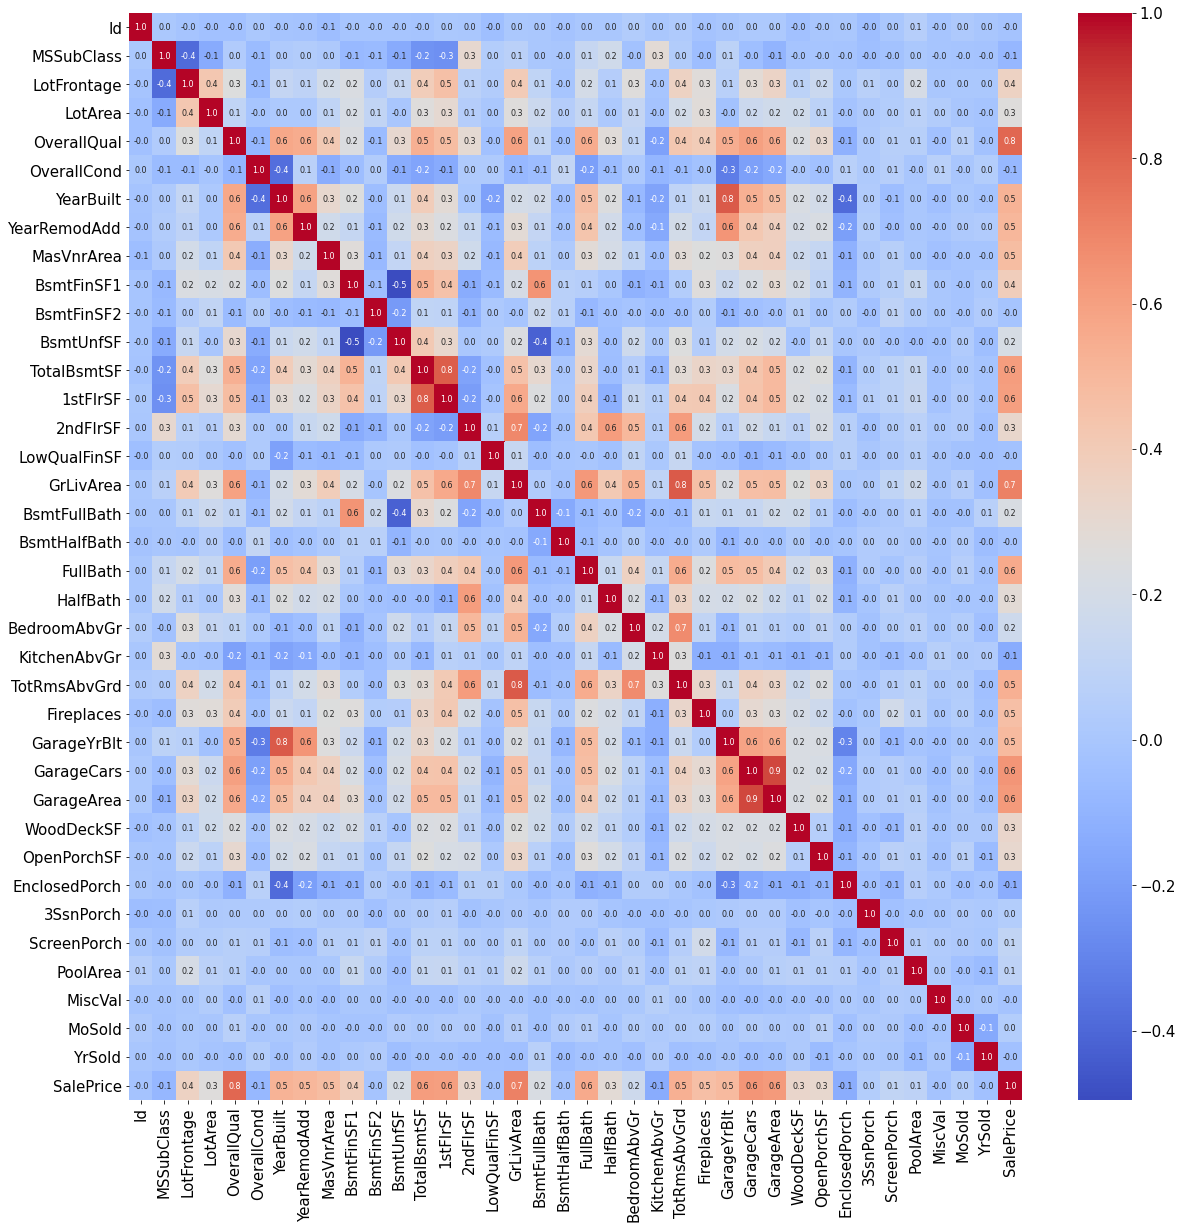

In [227]:
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".1f", annot_kws={'size': 8})

if(save_graphs):
    fig.savefig(os.path.join(GRAPHS_PATH, "corr_matrix.png"))

['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


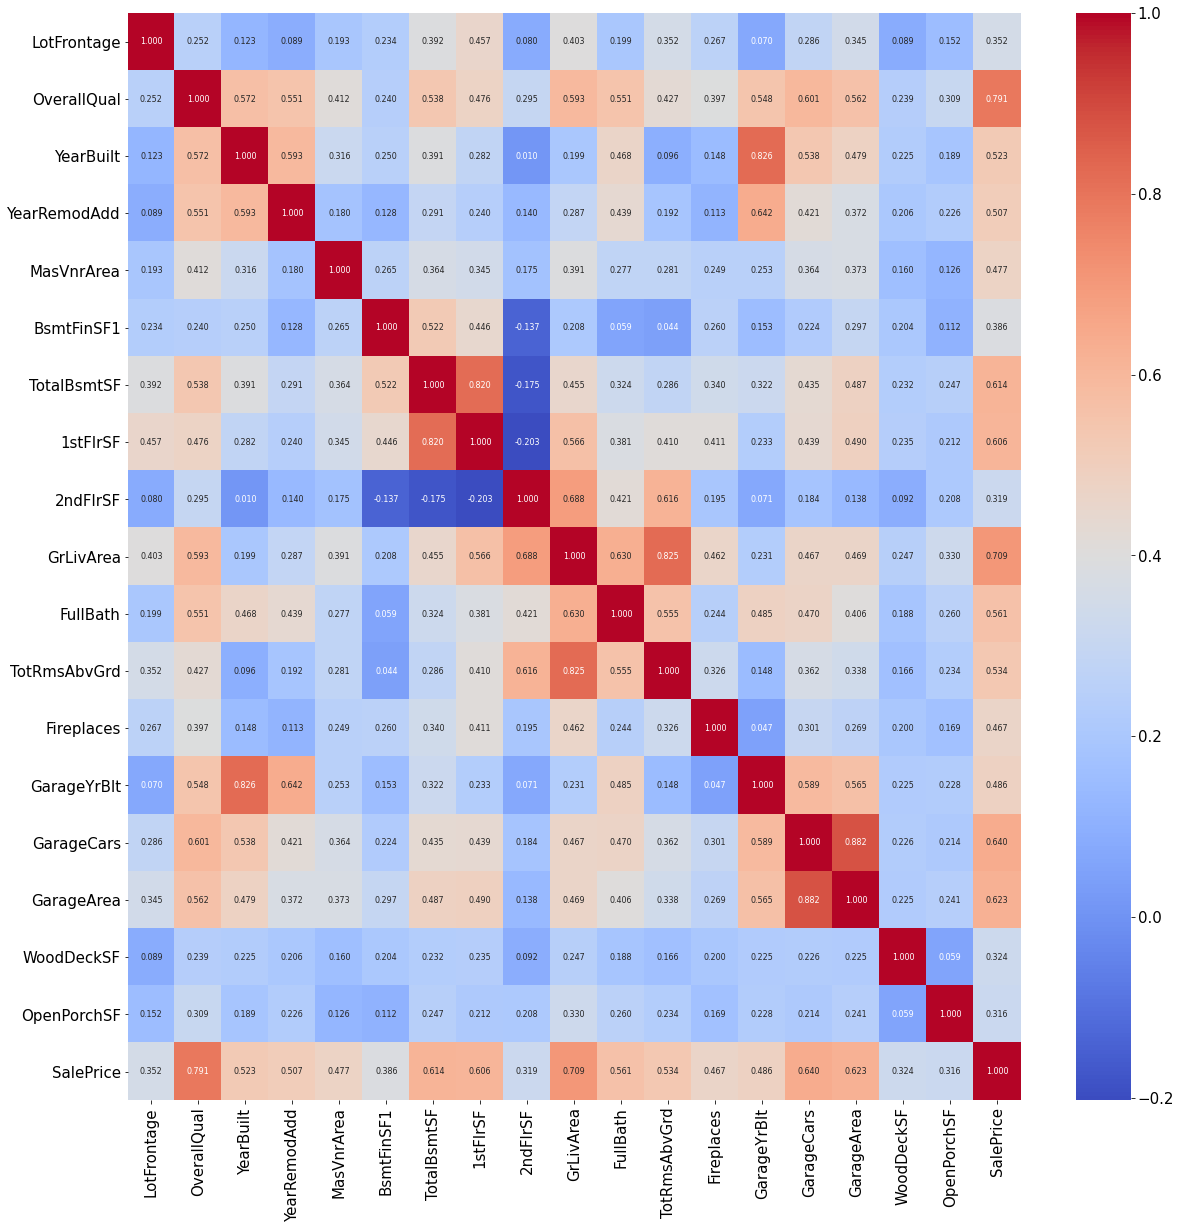

In [228]:
#Remove low correlated columns
low_corr_columns = get_low_correlation_columns(train_df_raw, "SalePrice", 0.3)
print(low_corr_columns)

new_train_df = train_df_raw.drop(low_corr_columns, axis = 1)

new_corr_matrix = new_train_df.corr()

fig = plt.figure(figsize=(20,20))
sns.heatmap(new_corr_matrix, cmap="coolwarm", annot=True, fmt=".3f", annot_kws={'size': 8})
if save_graphs:
    plt.savefig(os.path.join(GRAPHS_PATH, "min_corr_matrix.png"))
plt.show()

In [229]:
def get_pairwise_plot(df, target, threshold = 0.5, figsize = 20):
    corr_matrix = df.corr()
    series = corr_matrix[target]
    most_correlated = []
    for name, val in series.iteritems():
        if(abs(val) >= threshold):
            most_correlated.append(name)
    pairwise_df = df[most_correlated].copy()
    plt.figure(figsize=(figsize,figsize))
    sns.pairplot(pairwise_df, corner = True)

<Figure size 2160x2160 with 0 Axes>

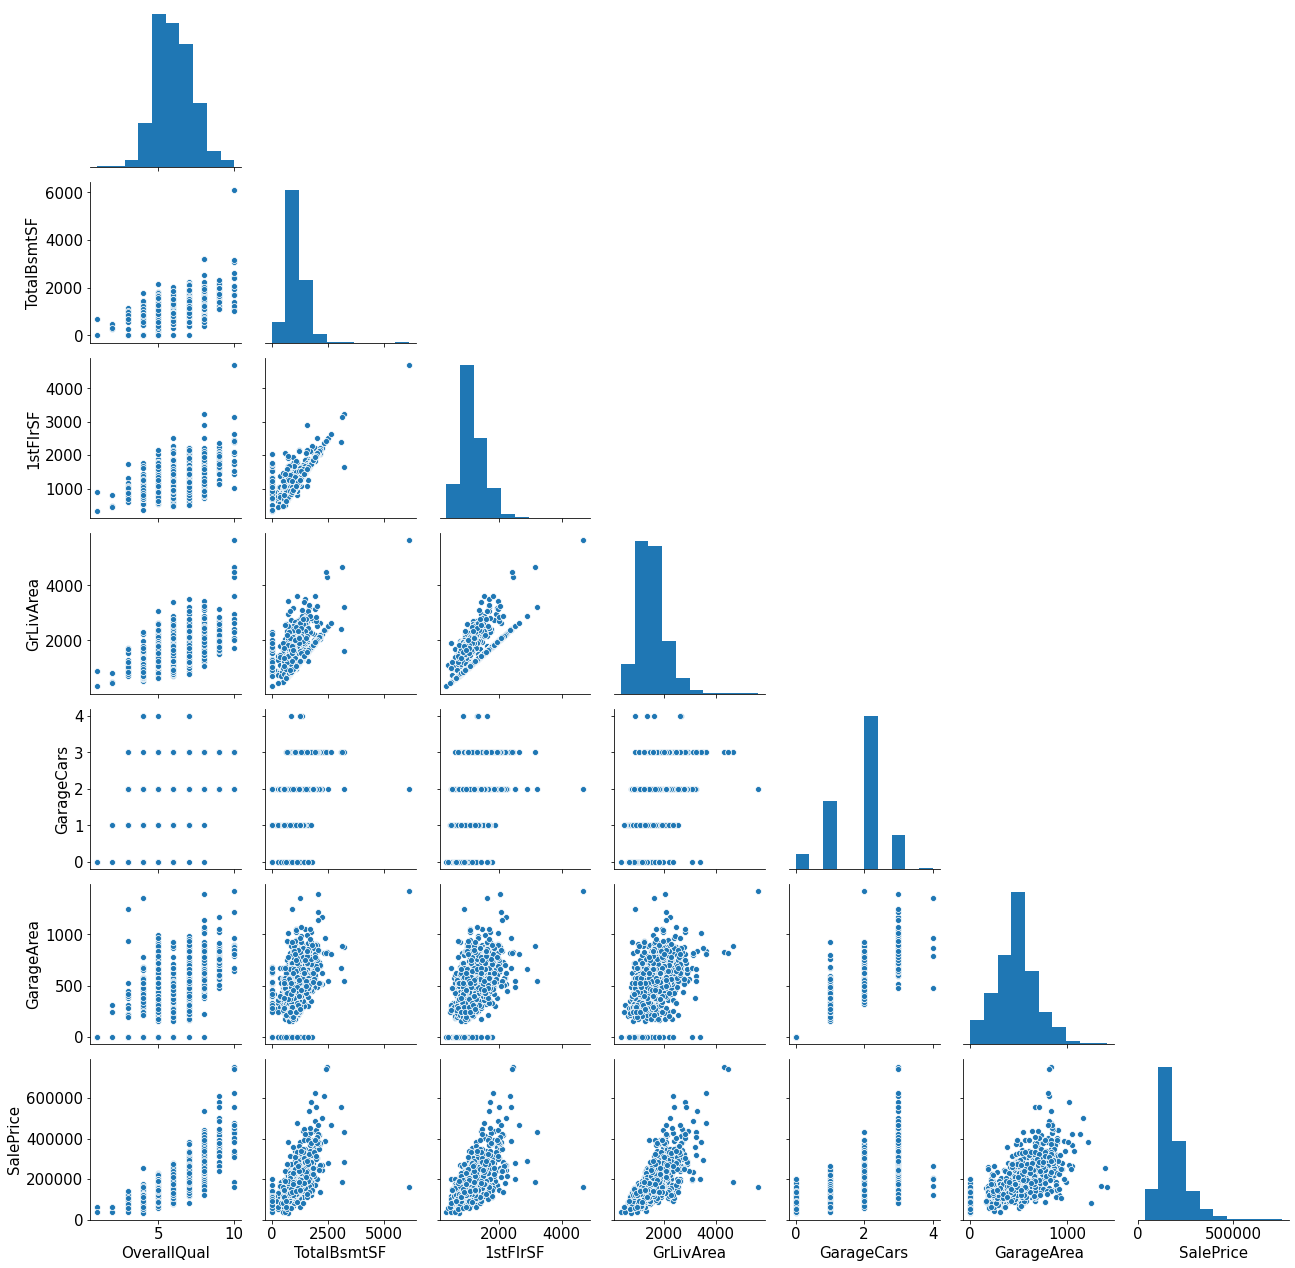

In [230]:
#Pairwise plot with seaborn: https://seaborn.pydata.org/generated/seaborn.pairplot.html
#Choose the most correlated variables to a new df

# pairwise_df = train_df[['OverallCond', 'GarageArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']].copy()
get_pairwise_plot(train_df_raw, "SalePrice", threshold = 0.6,figsize = 30)
if(save_graphs):
    plt.savefig(os.path.join(GRAPHS_PATH, "pairwise_plot_to_sale_price.png"),bbox_inches = "tight")
plt.show()


<Figure size 2160x2160 with 0 Axes>

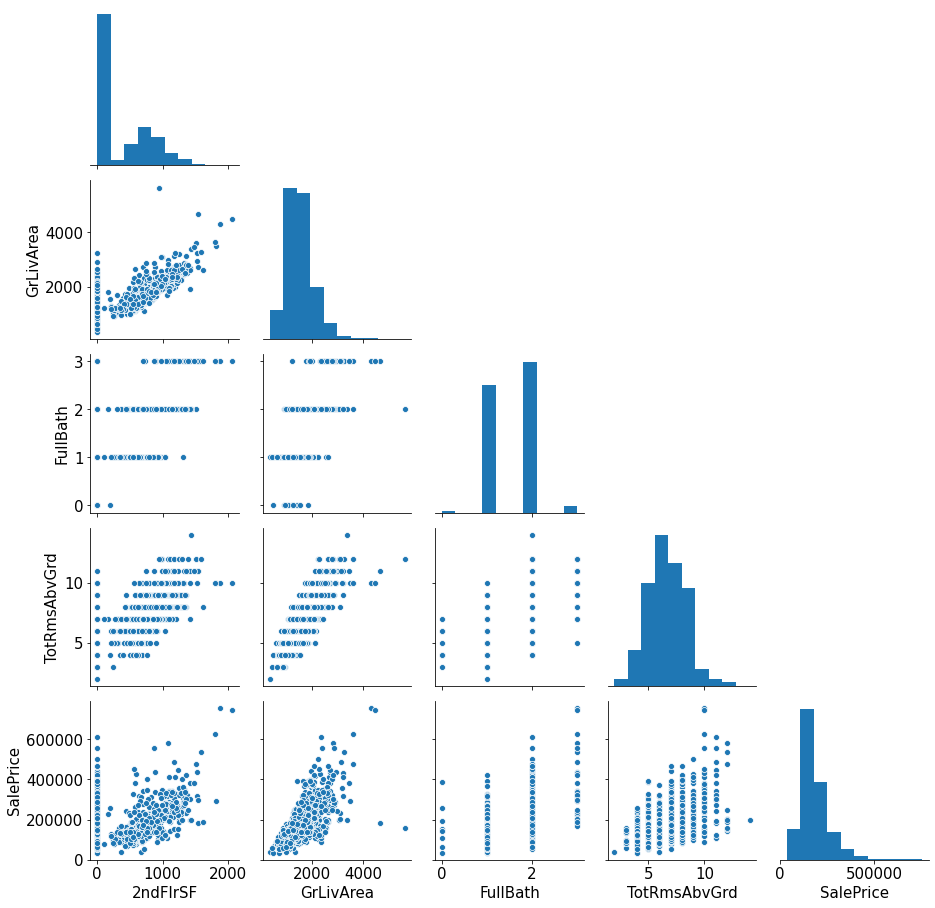

In [231]:
get_pairwise_plot(train_df_raw,"GrLivArea",  threshold = 0.6,figsize = 30)
if(save_graphs):
    plt.savefig(os.path.join(GRAPHS_PATH, "pairwise_plot_to_GrLivArea.png"),bbox_inches = "tight")
plt.show()


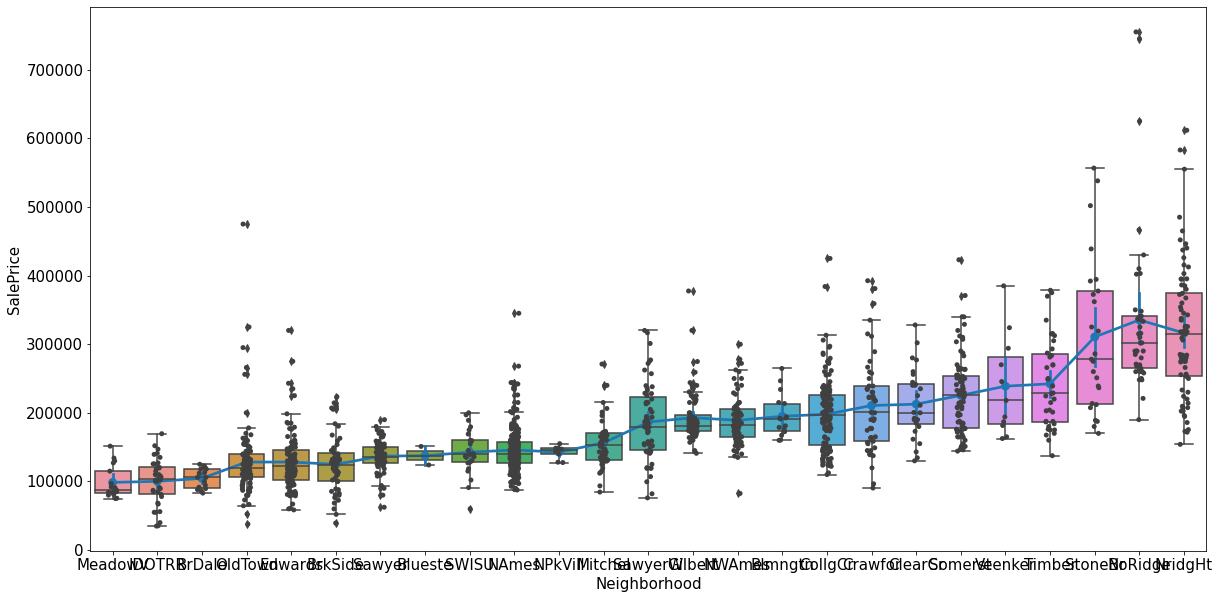

In [232]:

    
#THIS ASSUMPTION ABOUT NEIGHBORHOOD MAY NOT GENERALIZE WELL
groupby_neighborhood = train_df_raw[['SalePrice', 'Neighborhood']].groupby("Neighborhood")
# groupby_neighborhood_trim_mean = groupby_neighborhood.agg({"SalePrice": [lambda x: stats.trim_mean(x, 0.25)]})\
# .rename(columns={'<lambda>':'trim_mean'})

groupby_neighborhood_trim_mean = groupby_neighborhood.apply(lambda x: stats.trim_mean(x["SalePrice"], 0.25))
# groupby_neighborhood_mean = groupby_neighborhood["SalePrice"].mean()
# groupby_neighborhood_med = groupby_neighborhood["SalePrice"].median()
# print(groupby_neighborhood_mean.head())
    
neighborhood_sorted_trim_index = groupby_neighborhood_trim_mean.sort_values().index
# sorted_index = groupby_neighborhood_mean.sort_values().index
# sorted_med_index = groupby_neighborhood_med.sort_values().index
# print(sorted_neighborhood_index)
# categorical_corr_to_target_plot("Neighborhood", "SalePrice", train_df, sorted_med_index, point_plot=True)

categorical_corr_to_target_plot("Neighborhood", "SalePrice", train_df_raw, order_index =neighborhood_sorted_trim_index, point_plot=True)

# categorical_corr_to_target_plot("Neighborhood", "SalePrice", train_df, sorted_index, point_plot=True)


In [233]:
#Assiociation test between Neighborhood, OverallQual, ... ( Categorical ) to Sale Price (Numerical)
grouped_neighborhood = train_df_raw[["Neighborhood", "SalePrice"]].groupby("Neighborhood").mean()
grouped_neighborhood.head(100)

SalePrice
Neighborhood               
Blmngtn       194870.882353
Blueste       137500.000000
BrDale        104493.750000
BrkSide       124834.051724
ClearCr       212565.428571
CollgCr       197965.773333
Crawfor       210624.725490
Edwards       128219.700000
Gilbert       192854.506329
IDOTRR        100123.783784
MeadowV        98576.470588
Mitchel       156270.122449
NAmes         145847.080000
NPkVill       142694.444444
NWAmes        189050.068493
NoRidge       335295.317073
NridgHt       316270.623377
OldTown       128225.300885
SWISU         142591.360000
Sawyer        136793.135135
SawyerW       186555.796610
Somerst       225379.837209
StoneBr       310499.000000
Timber        242247.447368
Veenker       238772.727273

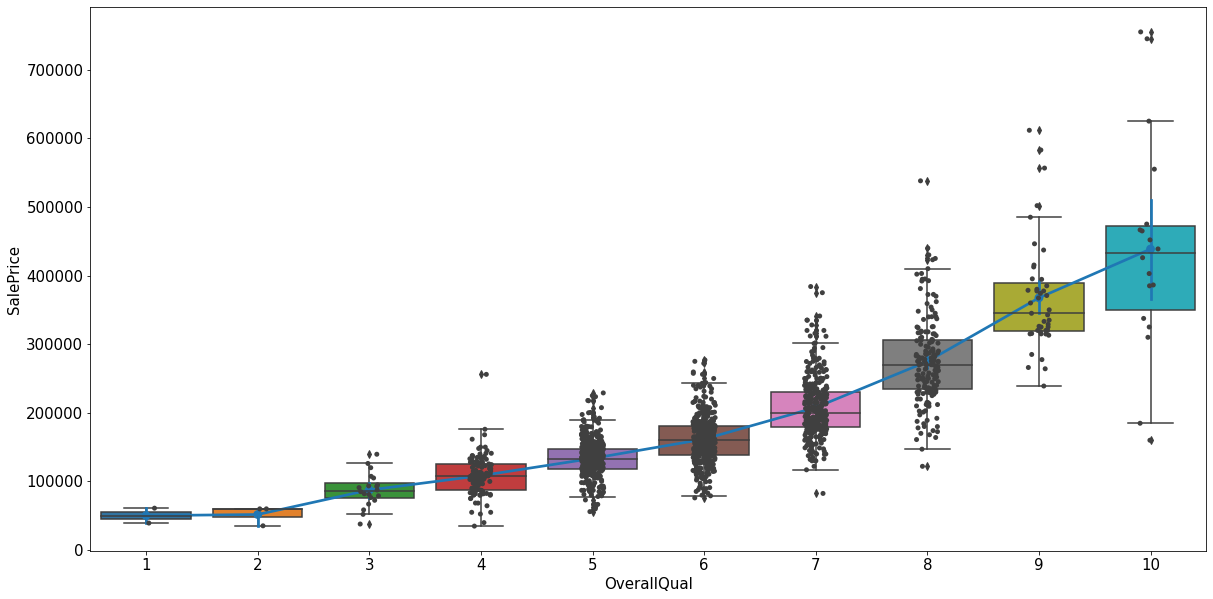

In [234]:
categorical_corr_to_target_plot("OverallQual", "SalePrice", train_df_raw, point_plot=True)

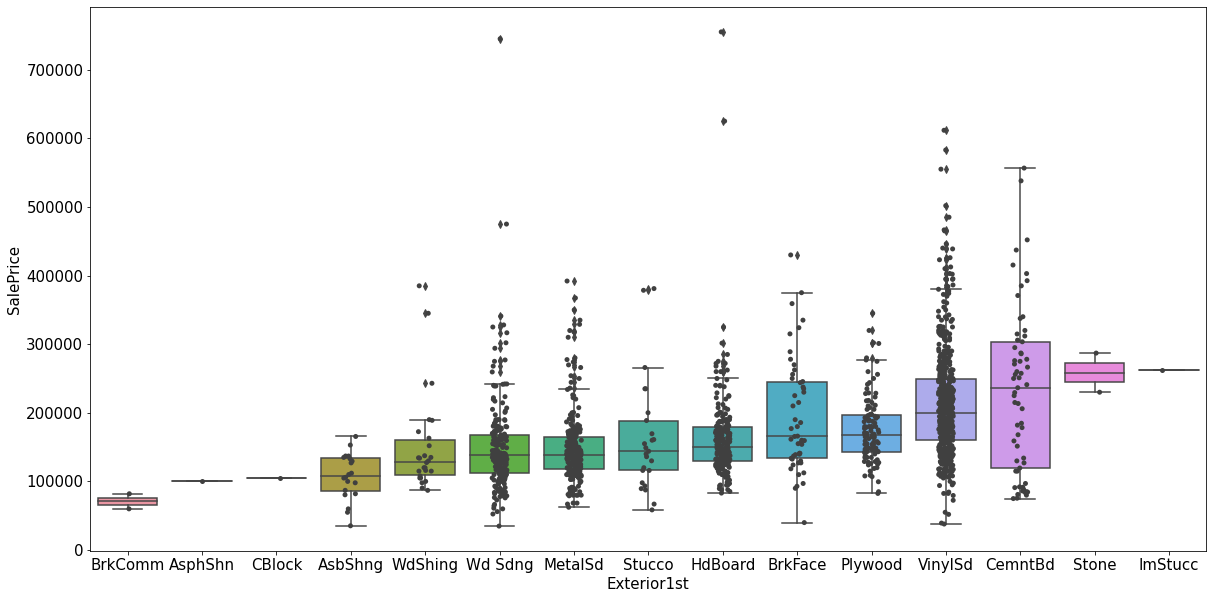

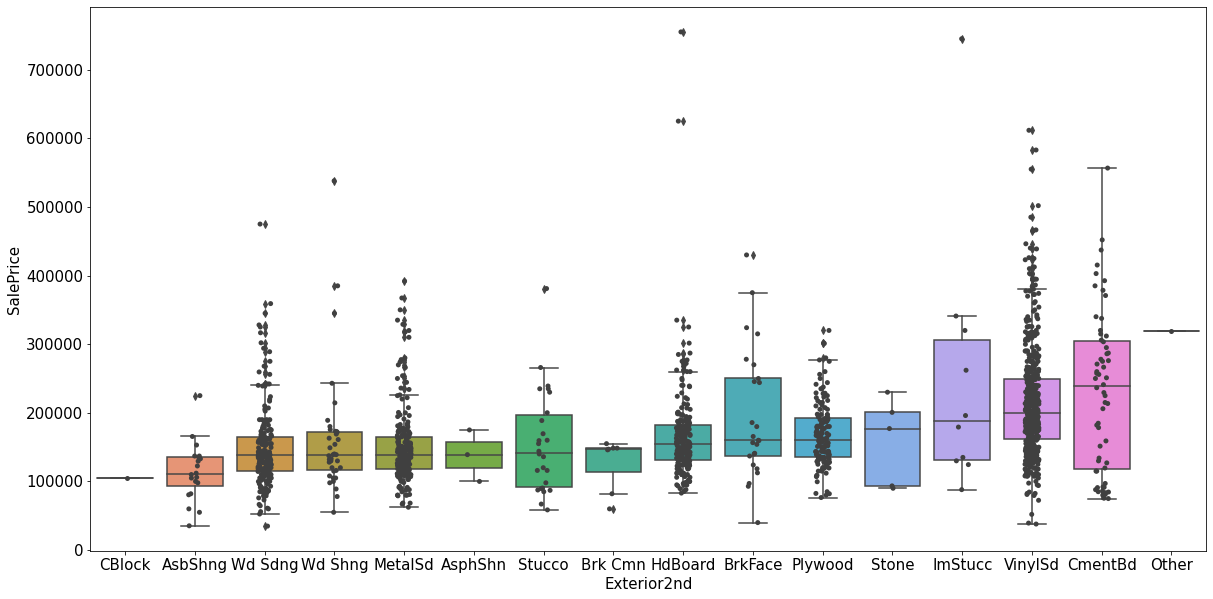

In [235]:
grouped_median_exterior1st = train_df_raw[['SalePrice', 'Exterior1st']].groupby("Exterior1st").median()
grouped_median_exterior1st_sorted_index = grouped_median_exterior1st.sort_values("SalePrice").index

grouped_median_exterior2nd = train_df_raw[['SalePrice', 'Exterior2nd']].groupby("Exterior2nd").median()
grouped_median_exterior2nd_sorted_index = grouped_median_exterior2nd.sort_values("SalePrice").index

categorical_corr_to_target_plot("Exterior1st", "SalePrice", train_df_raw, order_index = grouped_median_exterior1st_sorted_index)

categorical_corr_to_target_plot("Exterior2nd", "SalePrice", train_df_raw, order_index = grouped_median_exterior2nd_sorted_index)

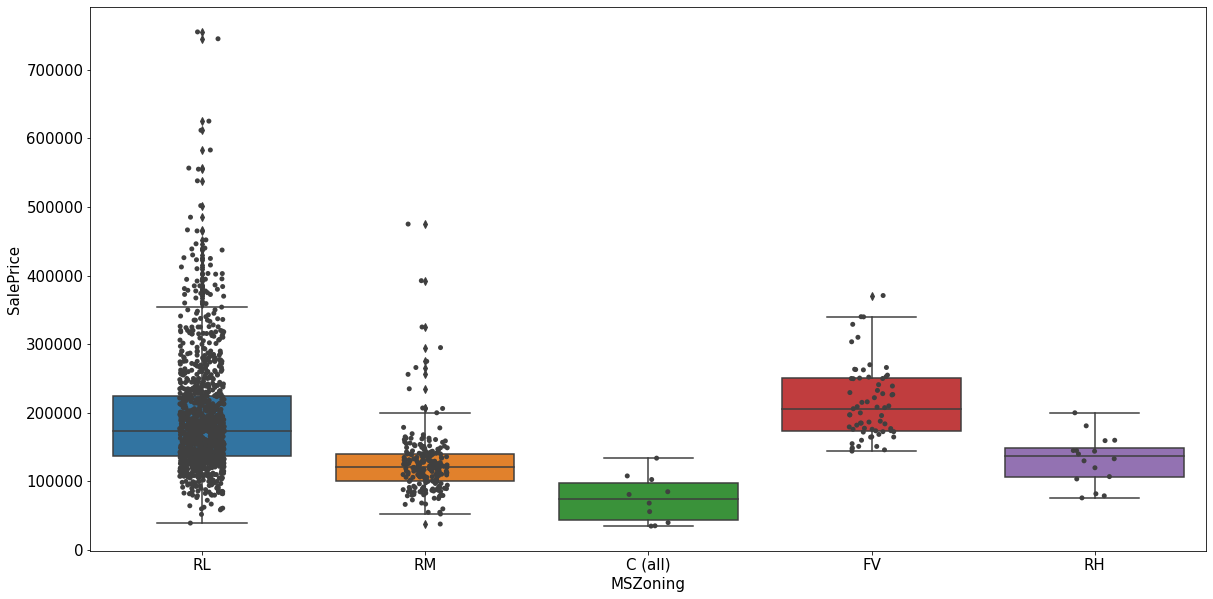

In [236]:
categorical_corr_to_target_plot("MSZoning", "SalePrice", train_df_raw)

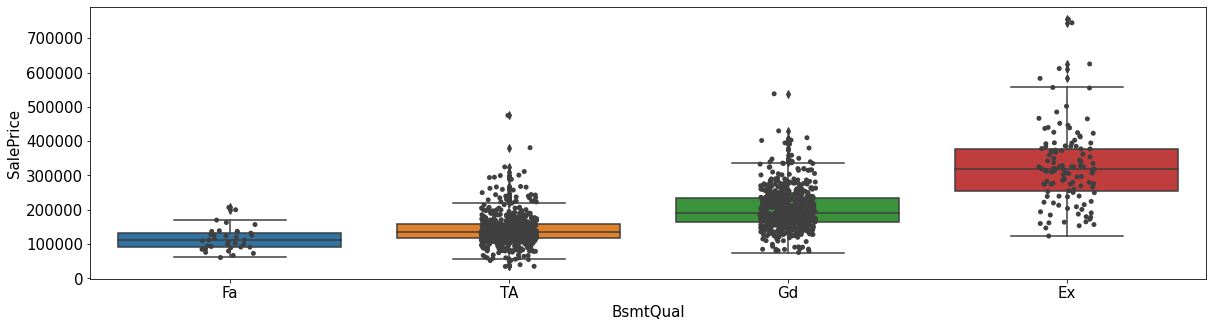

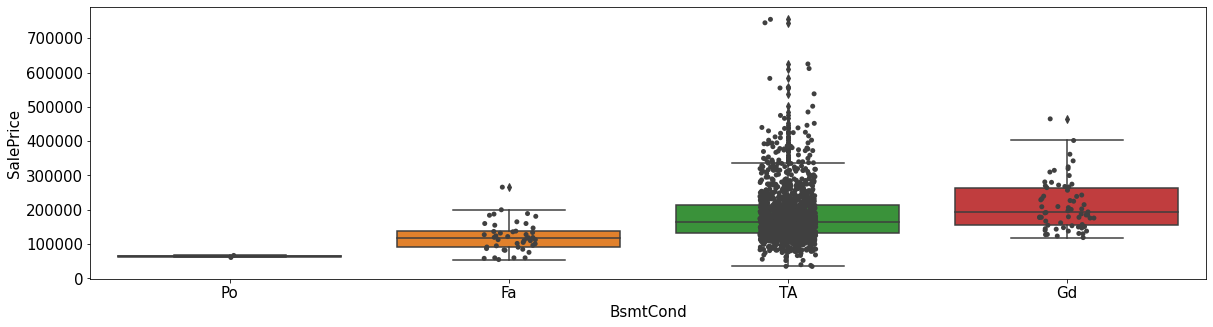

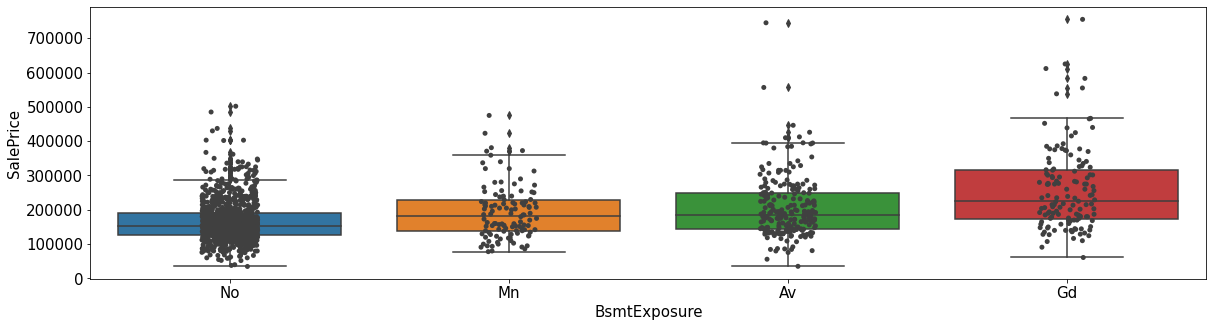

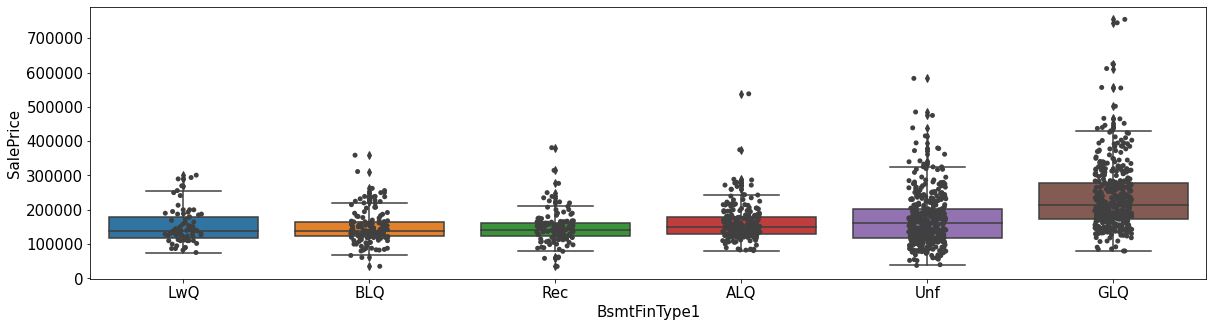

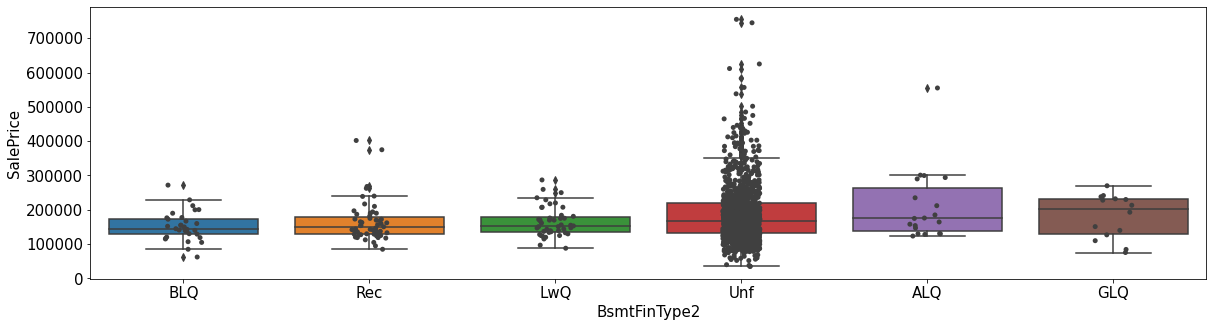

In [237]:
idx = sort_group_index("BsmtQual", "SalePrice", train_df_raw, lambda x: stats.trim_mean(x["SalePrice"], 0.25))
categorical_corr_to_target_plot("BsmtQual", "SalePrice", train_df_raw, fig_height=5, order_index = idx)

idx = sort_group_index("BsmtCond", "SalePrice",  train_df_raw, lambda x: stats.trim_mean(x["SalePrice"], 0.25))
categorical_corr_to_target_plot("BsmtCond", "SalePrice", train_df_raw, fig_height=5, order_index = idx)

idx = sort_group_index("BsmtExposure", "SalePrice", train_df_raw,  lambda x: stats.trim_mean(x["SalePrice"], 0.25))
categorical_corr_to_target_plot("BsmtExposure", "SalePrice", train_df_raw, fig_height=5, order_index = idx)

idx = sort_group_index("BsmtFinType1", "SalePrice", train_df_raw,  lambda x: stats.trim_mean(x["SalePrice"], 0.25))
categorical_corr_to_target_plot("BsmtFinType1", "SalePrice", train_df_raw, fig_height=5, order_index = idx)

idx = sort_group_index("BsmtFinType2", "SalePrice", train_df_raw,  lambda x: stats.trim_mean(x["SalePrice"], 0.25))
categorical_corr_to_target_plot("BsmtFinType2", "SalePrice", train_df_raw, fig_height=5, order_index = idx)


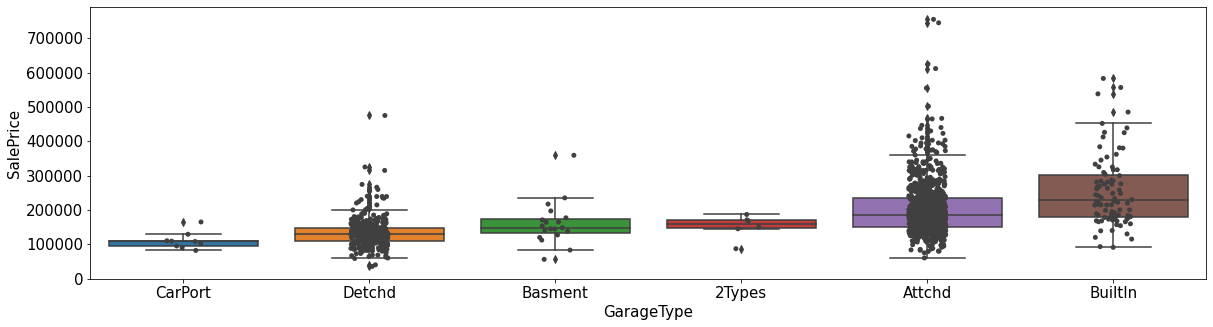

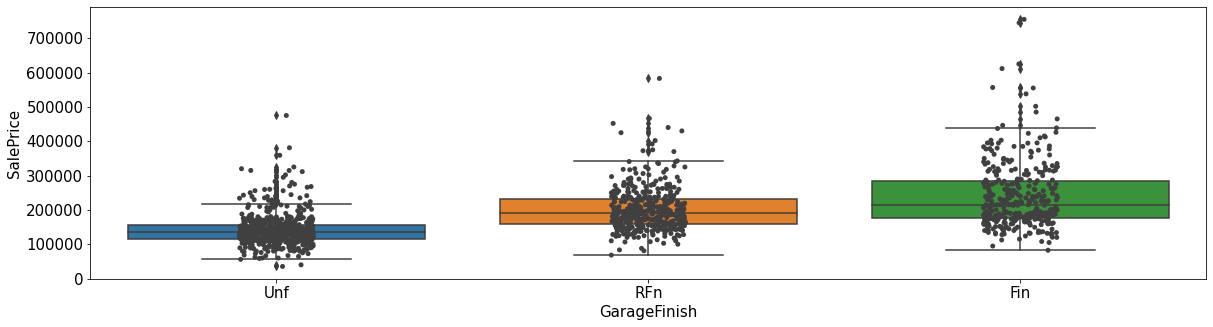

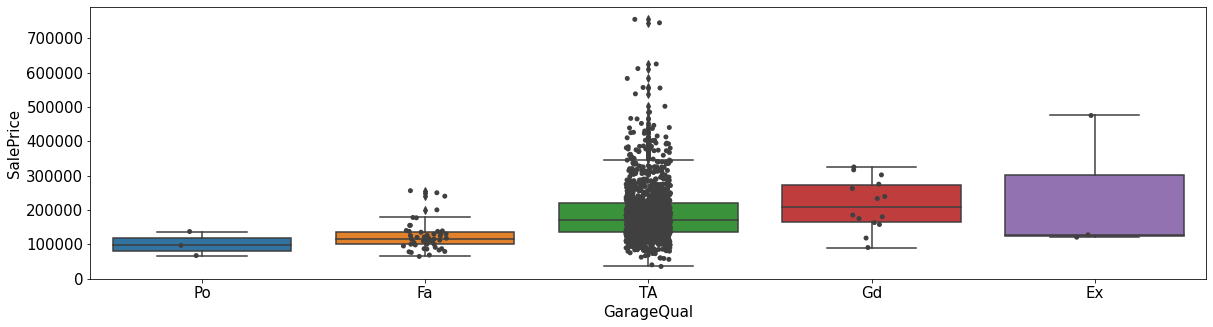

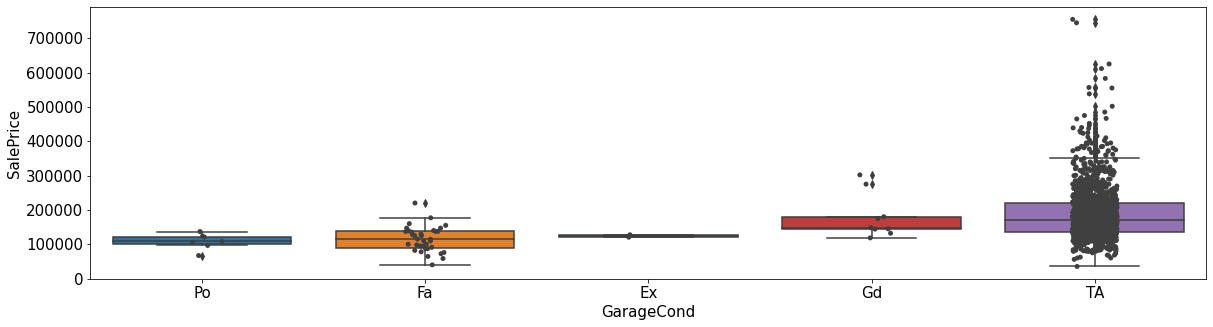

In [238]:
idx = sort_group_index("GarageType", "SalePrice", train_df_raw,  lambda x: stats.trim_mean(x["SalePrice"], 0.25))
categorical_corr_to_target_plot("GarageType", "SalePrice", train_df_raw, fig_height=5, order_index = idx)

idx = sort_group_index("GarageFinish", "SalePrice", train_df_raw,  lambda x: stats.trim_mean(x["SalePrice"], 0.25))
categorical_corr_to_target_plot("GarageFinish", "SalePrice", train_df_raw, fig_height=5, order_index = idx)

idx = sort_group_index("GarageQual", "SalePrice", train_df_raw,  lambda x: stats.trim_mean(x["SalePrice"], 0.25))
categorical_corr_to_target_plot("GarageQual", "SalePrice", train_df_raw, fig_height=5, order_index = idx)

idx = sort_group_index("GarageCond", "SalePrice", train_df_raw,  lambda x: stats.trim_mean(x["SalePrice"], 0.25))
categorical_corr_to_target_plot("GarageCond", "SalePrice", train_df_raw, fig_height=5, order_index = idx)

In [239]:
# #Combine Exterior1st and Exterior2nd 
# combined_exterior = train_df[['Exterior1st', 'Exterior2nd', "SalePrice"]].copy()

# # combined_exterior.head()
# combined_exterior["Exterior"] = combined_exterior.apply(lambda x: x['Exterior1st'] + "," + x['Exterior2nd'], axis=1)

# combined_exterior.head()

#CONCLUSION: 
# - Can't fuse the 2 exterior because the value combination is 225 but there's only 67 combinations presented in the training data
# - The 2 are not the same, the material on 1st floor can be different from 2nd floor, and Sale Price could 
#   not be correlated to a certain combination
# - Doesn't make senese to assume the floors have the same distribution and correlation to each other

#HOW TO TRANSFORM:
# - Combine values that have small appearance to another value that is similiar to it in terms of median
# - Assume the exteriors seperately that certain type of exterior on the 1st and 2nd floor may correlated to SalePrice


## NOTES

**Drop low correlation columns:**

all columns that have corr < 0.3

Features that have more than (1460 /2) = 730 NaN values

**Fill NaN as "None"

GarageType
GarageFinish
GarageQual
GarageCond

BsmtQual                          
BsmtCond            
BsmtExposure                
BsmtFinType1                     
BsmtFinType2

**Drop high correlated predictors ( to reduce dimension )**

- Highly correlated

GarageYrBlt ( corr to YearBuilt = 0.826)
GarageArea ( corr to GarageCars = 0.882)
1stFlrSF ( corr to TotalBsmt = 0.820)
TotRmsAbvGrd ( corr to GrLivArea = 0.825)

- Too many
MiscFeature: too many
Fence: too many
PoolQC: too many
FireplaceQu: too many
LotShape: too many
Alley: too many
LotFrontage: Low correlation to SalePrice, small correlation to other predictors


**Fuse what:**

--
Exterior1st and Exterior2nd: (CAN'T, REASONED ABOVE)

1stFlrSF and 2ndFlrSF to a totalSF and drop those (EXTRANEOUS! The total is essentially GrLivArea, Consider dropping these 2 features)

**Categorical:**


**Nominial:**
BsmtExposure
BsmtFinType1
BsmtFinType2

**Ordinal:**
'MSZoning', 'LotShape', 'LandContour', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BstmCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FirePlaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'

Making assumption about the neighborhood:
    - There's a certain neighborhood that has higher saleprice than others (Sort with the median sale price ). 
   
Same for the below:

GarageType
GarageFinish
GarageQual
GarageCond

BsmtQual
BsmtCond

Already processed in the dataset

**Scale what:**


**Box Cox Transformation**(A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape.)


**Log transform**(The log transformation is actually a special case of the Box-Cox transformation when λ = 0)






(1460, 81)


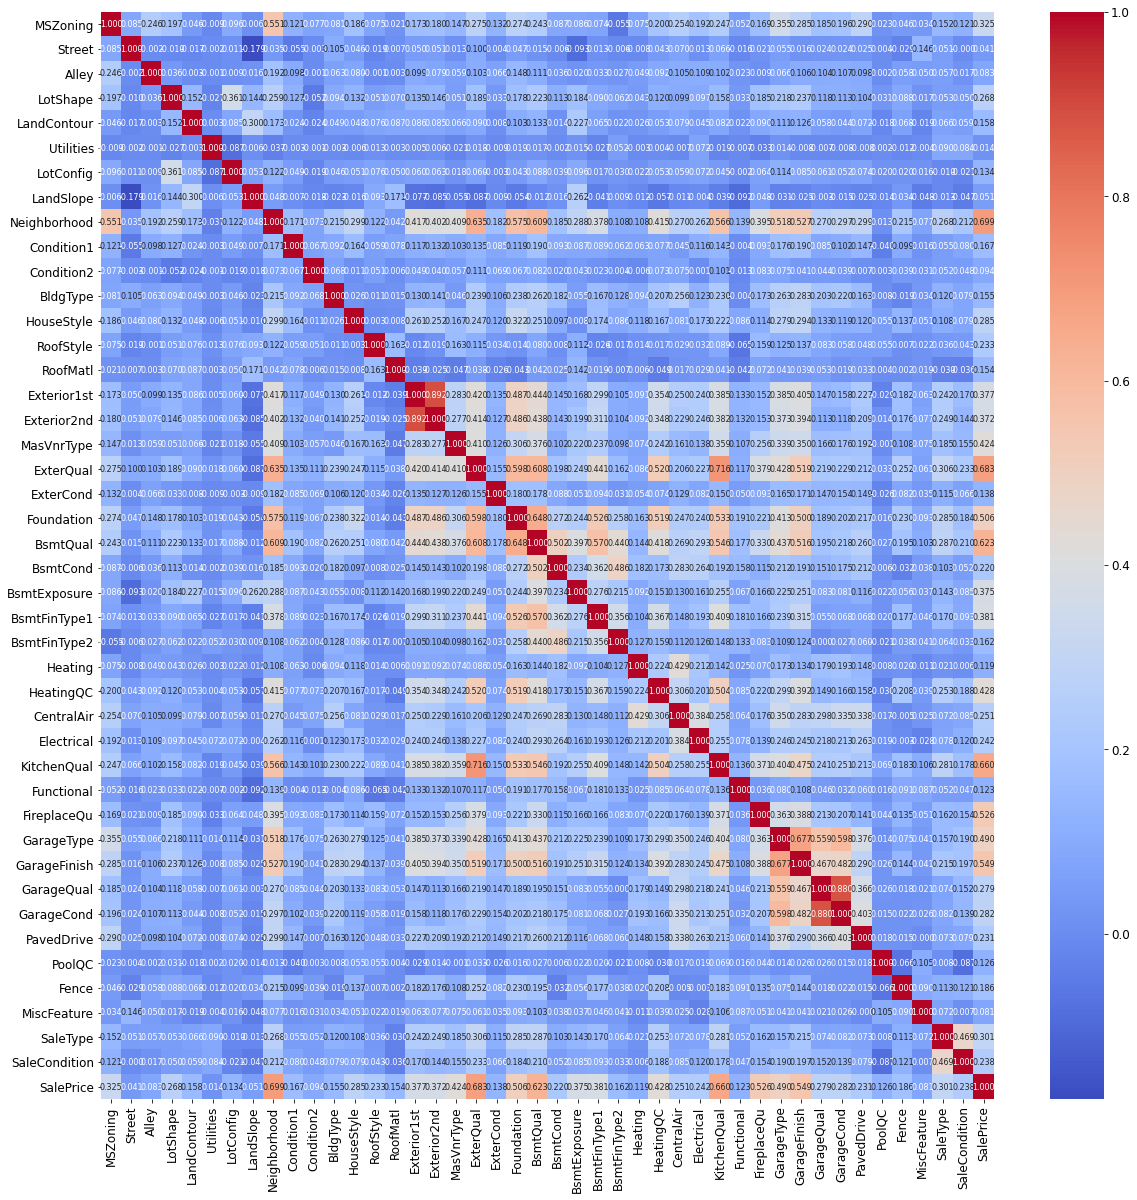

In [338]:
from sklearn.preprocessing import PowerTransformer

#Start processing the data

plt.rc("font", size = 12)

train_df = train_df_raw.copy()
print(train_df.shape)

# sys.exit()
#Dropping columns

#Low corr features
# low_corr_columns = get_low_correlation_columns(train_df, "SalePrice", 0.1)

#Fill NaN with "None"
columns = ["GarageType", "GarageFinish", "GarageQual", "GarageCond", \
           "BsmtCond", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", \
           "FireplaceQu", "PoolQC", "MiscFeature", "Alley"]

for column in columns:
    train_df.fillna("None", inplace= True)
    
#Fill missing with 0

#Impute missing values

    
#Convert MasVnrArea to numeric by replacing "None" to 0
#Process LotFrontage and GarageYrBlt
# Print all unique values
# print(train_df["LotFrontage"].unique().tolist())
# print(train_df["GarageYrBlt"].unique().tolist())
# print(train_df["GarageYrBlt"].unique().tolist())
train_df["MasVnrArea"].replace({"None": 0}, inplace = True)
train_df["MasVnrArea"] = train_df["MasVnrArea"].astype("int64")

train_df["LotFrontage"].replace({"None": 0}, inplace = True)
train_df["LotFrontage"] = train_df["LotFrontage"].astype("int64")

train_df["GarageYrBlt"].replace({"None": 1950}, inplace = True)
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].astype("int64")

# train_df = train_df.drop(low_corr_columns + to_drop, axis = 1)

#Heat map to check the correlation with categorical data
check_correlation_of_all_categorical("SalePrice", train_df)

# #Encoding                                     
def encode_as_ordinal(feature, target, df):
    '''
        Encode object value to numeric
        NOTE: Becareful when make assumption about the ranking nature of the feature
        Sorting using trim mean
        
        @param:
            df: pandas.DataFrame
            feature: string
        @return
    '''
    idx = sort_group_index(feature, target, df, lambda x: stats.trim_mean(x["SalePrice"], 0.25))
    
    numeric_map = {}
    
    for index, value in enumerate(idx):
        numeric_map.setdefault(value, index)
    df[feature] = df[feature].map(numeric_map)    
    
ordinal_assumptions = [ "Alley", 'MSZoning', 'LotShape', 'LandContour', 'Fence',\
                       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', \
                       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', \
                       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',\
                       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual',\
                       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', \
                       'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition', 'LotConfig', 'RoofMatl', 'PoolQC']

for feature in ordinal_assumptions:
    encode_as_ordinal(feature, "SalePrice", train_df)

#Normalize any float values with skewness > 5
to_normalize_columns = ["SalePrice", "GrLivArea", "LotArea"]

for column in to_normalize_columns:
    train_df[column] = np.log(train_df[column])
# pow_trans = PowerTransformer()
# train_df[normalized_columns] = pow_trans.fit_transform(train_df[normalized_columns])
    
#Drop Id, PoolQC, PoolArea
train_df.drop(["Id"],axis=1, inplace=True)

In [339]:
descripe_df = describe_data(train_df, "SalePrice")
# describe_df["skewness"].astype("float64")
print(descripe_df.sort_values(by="corr_to_SalePrice").to_string())



              data_types unique_values nan     mean   median corr_to_SalePrice outliers kurtosis skewness
EnclosedPorch      int64           120   0    21.95     0.00          -0.14905      208    10.43     3.09
KitchenAbvGr       int64             4   0     1.05     1.00         -0.147548       68    21.53     4.49
MSSubClass         int64            15   0    56.90    50.00         -0.073959      103     1.58     1.41
LowQualFinSF       int64            24   0     5.84     0.00        -0.0379628       26    83.23     9.01
YrSold             int64             5   0  2007.82  2008.00         -0.037263        0    -1.19     0.10
OverallCond        int64             9   0     5.58     5.00         -0.036868      125     1.11     0.69
MiscVal            int64            21   0    43.49     0.00        -0.0200208       52   701.00    24.48
BsmtHalfBath       int64             3   0     0.06     0.00       -0.00514909       82    16.40     4.10
BsmtFinSF2         int64           144   0    

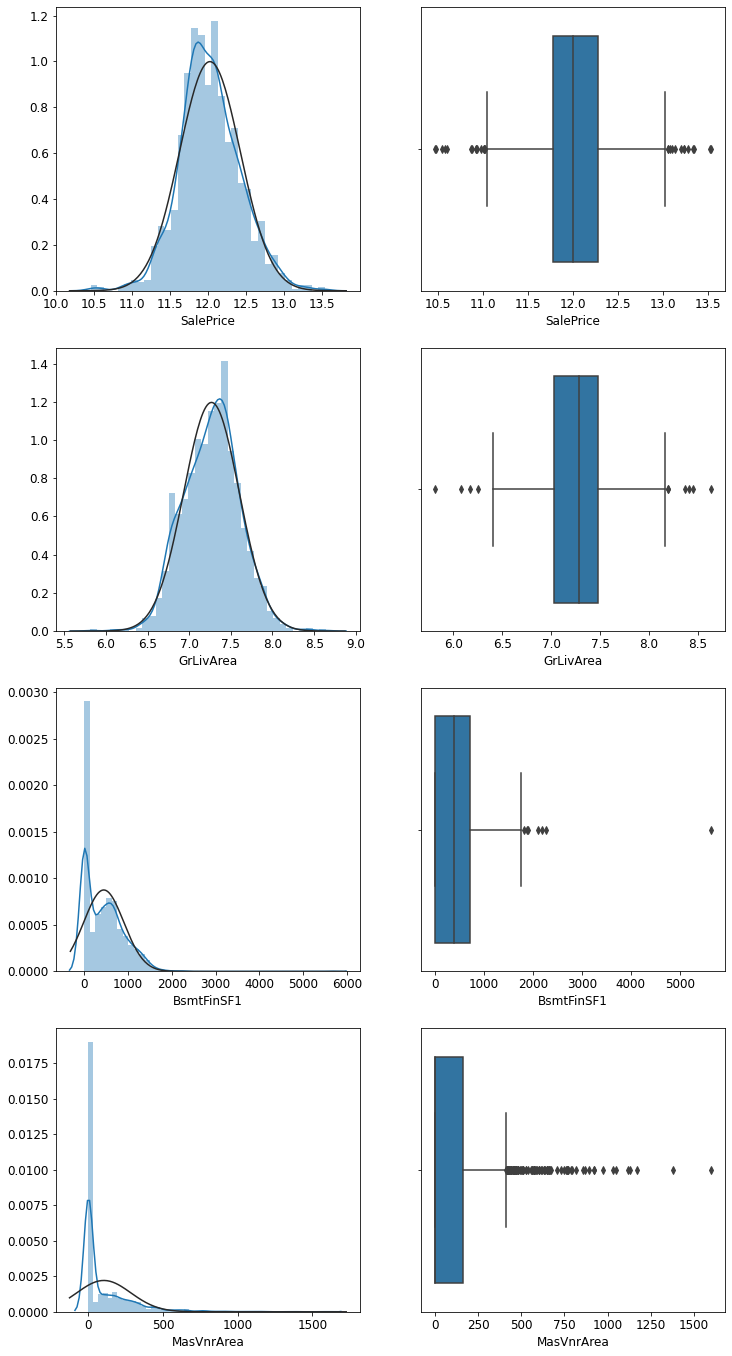

In [340]:
columns = ["SalePrice", "GrLivArea", "BsmtFinSF1", "MasVnrArea"]

draw_hist_and_box_int_data(train_df, columns, cell_size =3)

In [341]:
#Get the dummies variable 
train_df = pd.get_dummies(train_df, drop_first=True)

In [342]:
train_df.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Alley  LotShape  LandContour  \
0          60         3           65  9.041922      1         0            1   
1          20         3           80  9.169518      1         0            1   
2          60         3           68  9.328123      1         1            1   
3          70         3           60  9.164296      1         1            1   
4          60         3           84  9.565214      1         1            1   

   LotConfig  LandSlope  Neighborhood  ...  MiscFeature  MiscVal  MoSold  \
0          0          0            16  ...            2        0       2   
1          2          0            20  ...            2        0       5   
2          0          0            16  ...            2        0       9   
3          1          0            17  ...            2        0       2   
4          2          0            23  ...            2        0      12   

   YrSold  SaleType  SaleCondition  SalePrice  Street_Pave  Utilities_NoSeWa  \
0    2008         5              4  12.247694            1                 0   
1    2007         5              4  12.109011            1                 0   
2    2008         5              4  12.317167            1                 0   
3    2006         5              1  11.849398            1                 0   
4    2008         5              4  12.429216            1                 0   

   CentralAir_Y  
0             1  
1             1  
2             1  
3             1  
4             1  

[5 rows x 80 columns]

In [343]:
#Save train df for future use
train_df.to_csv(os.path.join(SAVED_PROCESSED_DF, "train_df.csv"))
print(train_df.shape)

(1460, 80)
